# tensorflow 테스트

In [1]:
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(8, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',padding='same'), # Output: (7, 7, 8)
    Flatten(), # Output: 392
    # Dense(h, activation='linear') # h를 392로 고정
])

model.summary()

2025-05-21 16:42:15.370503: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-21 16:42:15.377612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747813335.385689  111590 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747813335.388255  111590 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747813335.394575  111590 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 392)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

# Library Import

In [1]:
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Dense, Flatten, Reshape

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

2025-05-21 16:47:50.624696: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-21 16:47:50.632014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747813670.640151  136540 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747813670.642713  136540 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747813670.648997  136540 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check dimensions
print("Training set shape:", X_train.shape)
print("First image shape:", X_train[0].shape)

Training set shape: (60000, 28, 28)
First image shape: (28, 28)


# autoencoder


Dense layer의 역할: 컨볼루션 레이어에서 추출된 특징맵을 저차원 벡터로 압축.
        이 저차원 벡터는 오토인코더의 '잠재 공간(latent space)' 또는 '병목 구간(bottleneck)'이라고도 함.

/////////////////////////////////

인코더의 마지막 Dense 레이어(잠재 공간):
Linear(없음): 제한 없이 값을 표현할 수 있게 함
tanh: -1에서 1 사이로 값을 제한하여 안정적인 학습을 도움
cf. 만약 softmax를 쓰면... 분류 문제를 위한 모델이 됨

히든 Dense 레이어:
ReLU: 보통 히든 레이어에서도 ReLU가 좋은 성능을 보임
Leaky ReLU: 더 강건한 학습을 원할 때 사용

디코더의 마지막 Dense 레이어(출력):
Sigmoid: 이미지 픽셀 값이 0~1 사이일 때 사용 (정규화된 이미지)
Linear: 원본 스케일로 복원하고 싶을 때
tanh: 출력 값을 -1~1 사이로 제한하고 싶을 때

In [12]:
# h = 8 # lantent vector
h = 32

# encoder
encoder = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'), #  (None, 28, 28, 16)  
    MaxPooling2D((2, 2), padding='same'), #  (None, 14, 14, 16)
    Conv2D(8, (3, 3), activation='relu', padding='same'), #  (None, 14, 14, 8)
    MaxPooling2D((2, 2)), #  (None, 7, 7, 8)
    Conv2D(8, (3, 3), activation='relu',padding='same'), # Output: (7, 7, 8)
    Flatten(), # Output: 392
    Dense(h, activation='linear')
])

# decoder
decoder = Sequential([
    Dense(7 * 7 * 8, activation='relu', input_shape=(h,)), # h를 입력으로 받아서 392차원으로 확장
    Reshape((7, 7, 8)), # 392를 (7, 7, 8)로 Reshape
    Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same'),  # (14, 14, 64)
    Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same'),  # (28, 28, 32)
    Conv2D(1, (3, 3), activation='sigmoid', padding='same') # (28, 28, 1)
])

autoencoder = Sequential([encoder, decoder])

autoencoder.compile(
    optimizer='adam', # 다른 것도 해보기
    loss='mse' # mae in CAN
)

# 모델 학습
history = autoencoder.fit(
    X_train, X_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, X_test)
)

# 학습된 모델 사용
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7222.5845 - val_loss: 7343.4521
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7218.6445 - val_loss: 7343.3823
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7209.5767 - val_loss: 7343.2734
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7230.8657 - val_loss: 7343.1479
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7228.3994 - val_loss: 7342.9839
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7208.1592 - val_loss: 7342.9102
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7236.9180 - val_loss: 7342.8896
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7199.1509 - val_loss: 7342.8936
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7201.8149 - val_loss: 7342.8784
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7224.9766 - val_loss: 7342.8711
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7218.7935 - val_lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


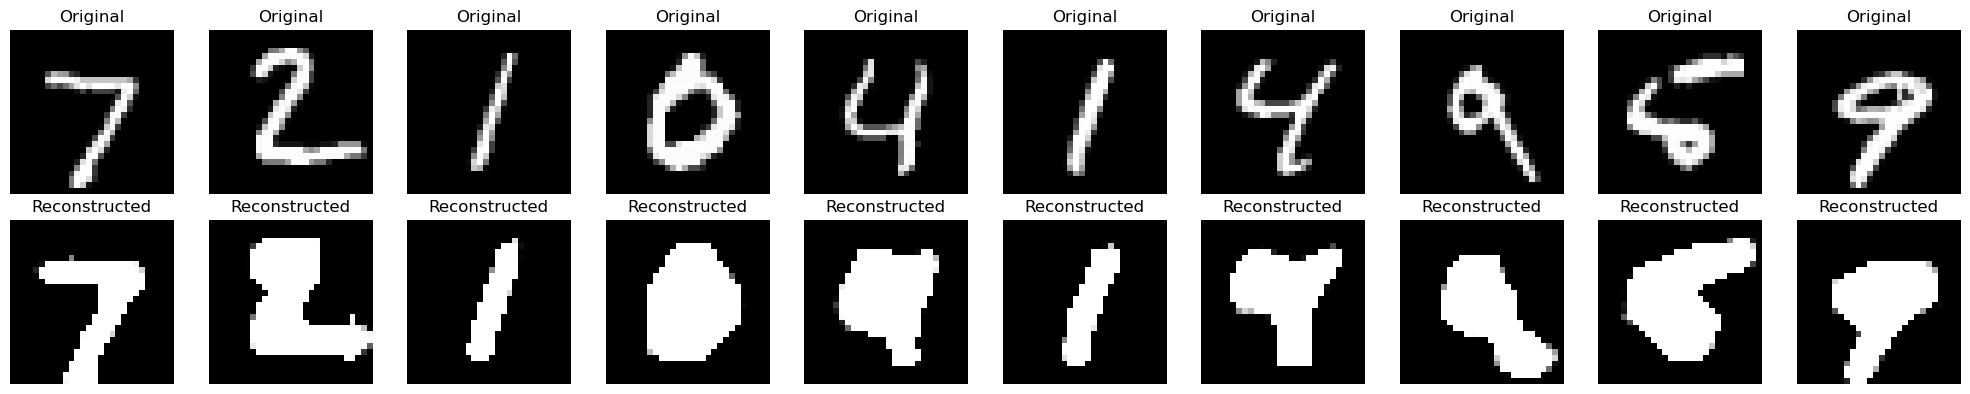

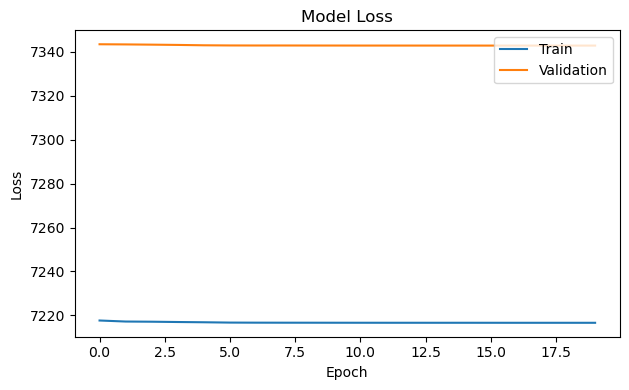

In [ ]:
# 필요한 추가 라이브러리
import matplotlib.pyplot as plt

# 모델 예측
encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

# 원본 이미지와 재구성된 이미지 비교 시각화
n = 10  # 표시할 이미지 개수
plt.figure(figsize=(20, 4))

for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # 재구성된 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
    
plt.tight_layout()
plt.show()